# ***Assignment #08***


---



**Hope To Skills**


**Free Artificial Intelligence Course**

**Instructor: Irfan Malik, Dr. Sheraz**

# ***Submitted by KHUSHBOO***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# **Exploratory Data Analysis (EDA)**

**c). Cleaning Dataset**

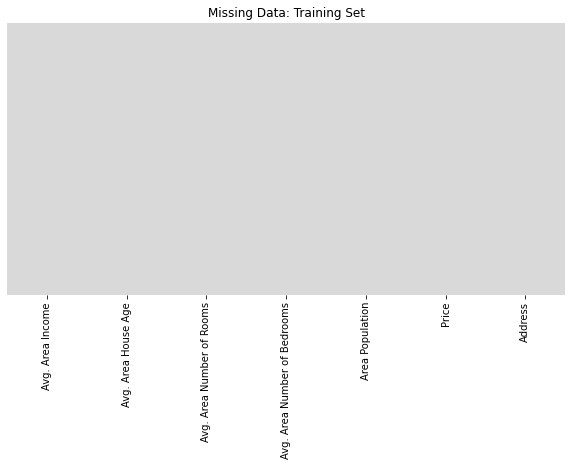

In [4]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [5]:
df.dropna()
df.drop("Address", axis=1, inplace=True)

**a,b). Visualizing and Identifying the Patters**

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

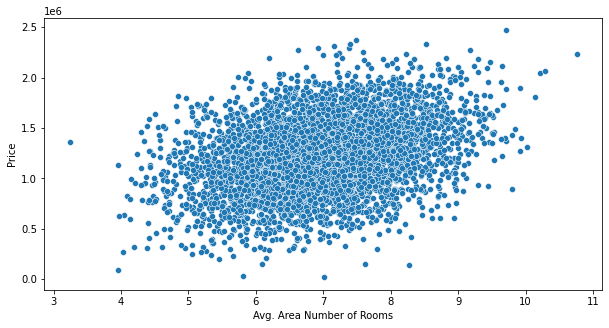

In [6]:
sns.scatterplot(data=df, x="Avg. Area Number of Rooms", y="Price")

We can see that Number of Rooms have direct impact on the Price

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

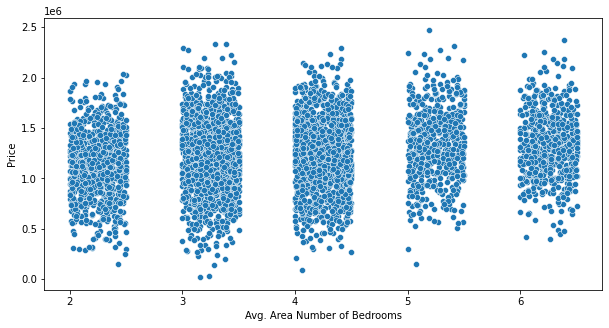

In [7]:
sns.scatterplot(data=df, x="Avg. Area Number of Bedrooms", y="Price")

Number of Bedrooms do not have any serious imapact on the Price

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

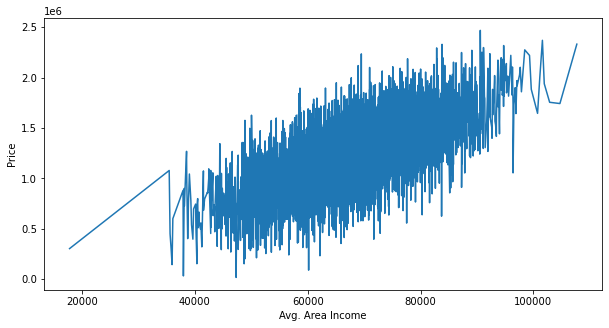

In [8]:
sns.lineplot(data=df, x="Avg. Area Income", y="Price")

Average Income has some impact on the price of the house

## **d). Target Variable**

I am selecting "Price" as my Target Variable. Because one may be interested in determining the Prices.

 ## **e). Transforming the Dataset**

In [9]:
# Splitting Features and Target Variable
X = df.drop("Price", axis=1)
y= df["Price"]

In [10]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()
X_trans = pre_process.fit_transform(X)                        # Transformed Features
y_trans = pre_process.fit_transform(y.values.reshape(-1,1))   # Transformed Target Variable

 ## **f). Splitting Dataset**

In [11]:
from sklearn.model_selection import train_test_split
# Without Feature and Target Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# With Feature Scaling and without Target scaling
fX_train, fX_test, fy_train, fy_test = train_test_split(X_trans, y, random_state=15)
# With Feature and Target scaling
ftX_train, ftX_test, fty_train, fty_test = train_test_split(X_trans, y_trans, random_state=25)

# **Using Scikitlearn to fit Regression models**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

 ## **a) Using different Regression models**

In [13]:
# Linear Regression
lr = LinearRegression()
# Decision Tree
dtr = DecisionTreeRegressor()
# Random Forest
rfr = RandomForestRegressor()
# Gradient Boosting
gbr = GradientBoostingRegressor()

## **i) Without Feature and Target Scaling**

In [14]:
# Linear Regression
lr_pred = lr.fit(X_train, y_train).predict(X_test)
# Decision Tree
dtr_pred = dtr.fit(X_train, y_train).predict(X_test)
# Random Forest
rfr_pred = rfr.fit(X_train, y_train).predict(X_test)
# Gradient Boosting
gbr_pred = gbr.fit(X_train, y_train).predict(X_test)

## **ii) With only Feature Scaling**

In [15]:
# Linear Regression
flr_pred = lr.fit(fX_train, fy_train).predict(fX_test)
# Decision Tree
fdtr_pred = dtr.fit(fX_train, fy_train).predict(fX_test)
# Random Forest
frfr_pred = rfr.fit(fX_train, fy_train).predict(fX_test)
# Gradient Boosting
fgbr_pred = gbr.fit(fX_train, fy_train).predict(fX_test)

## **iii). With Feature and Target Scaling**

In [16]:
# Linear Regression
ftlr_pred = lr.fit(ftX_train, fty_train).predict(ftX_test)
# Decision Tree
ftdtr_pred = dtr.fit(ftX_train, fty_train).predict(ftX_test)
# Random Forest
ftrfr_pred = rfr.fit(ftX_train, fty_train).predict(ftX_test)
# Gradient Boosting
ftgbr_pred = gbr.fit(ftX_train, fty_train).predict(ftX_test)

## **b). Calculating MSEs**

In [17]:
from sklearn.metrics import mean_squared_error

## **i). Without Feature and Target Scaling**

In [18]:
lr_mse = mean_squared_error(y_test, lr_pred)    # Linear Regression
dtr_mse = mean_squared_error(y_test, dtr_pred)  # Decision Tree
rfr_mse = mean_squared_error(y_test, rfr_pred)  # Random Forest
gbr_mse = mean_squared_error(y_test, gbr_pred)  # Gradient Boosting
print("Linear Regression: ", lr_mse)
print("Decision Tree: ", dtr_mse)
print("Random Forest: ", rfr_mse)
print("Gradient Boosting", gbr_mse)

Linear Regression:  10839453266.59872
Decision Tree:  32120251202.704163
Random Forest:  15057568662.563288
Gradient Boosting 12405829053.946968


## **ii). With only Feature Scaling**

In [19]:
flr_mse = mean_squared_error(fy_test, flr_pred)    # Linear Regression
fdtr_mse = mean_squared_error(fy_test, fdtr_pred)  # Decision Tree
frfr_mse = mean_squared_error(fy_test, frfr_pred)  # Random Forest
fgbr_mse = mean_squared_error(fy_test, fgbr_pred)  # Gradient Boosting
print("Linear Regression: ", flr_mse)
print("Decision Tree: ", fdtr_mse)
print("Random Forest: ", frfr_mse)
print("Gradient Boosting", fgbr_mse)

Linear Regression:  10521119110.087116
Decision Tree:  32864615636.536076
Random Forest:  14760424591.29761
Gradient Boosting 12313426196.755838


## **iii). With Feature and Target Scaling**

In [20]:
ftlr_mse = mean_squared_error(fty_test, ftlr_pred)    # Linear Regression
ftdtr_mse = mean_squared_error(fty_test, ftdtr_pred)  # Decision Tree
ftrfr_mse = mean_squared_error(fty_test, ftrfr_pred)  # Random Forest
ftgbr_mse = mean_squared_error(fty_test, ftgbr_pred)  # Gradient Boosting
print("Linear Regression: ", ftlr_mse)
print("Decision Tree: ", ftdtr_mse)
print("Random Forest: ", ftrfr_mse)
print("Gradient Boosting", ftgbr_mse)

Linear Regression:  0.08551246949953836
Decision Tree:  0.24665537295085432
Random Forest:  0.12029146607977041
Gradient Boosting 0.10231030087323094


## **c). Ranking MSEs of different Models**

## **i). Without Feature and Target Scaling***

In [21]:
model_scores = {
    "Linear Regression": lr_mse,
    "Decision Tree": dtr_mse,
    "Random Forest": rfr_mse,
    "Gradient Boosting": gbr_mse
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 10839453266.59872
2. Gradient Boosting: 12405829053.946968
3. Random Forest: 15057568662.563288
4. Decision Tree: 32120251202.704163


## **ii). With only Feature Scaling***

In [22]:
model_scores = {
    "Linear Regression": flr_mse,
    "Decision Tree": fdtr_mse,
    "Random Forest": frfr_mse,
    "Gradient Boosting": fgbr_mse
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 10521119110.087116
2. Gradient Boosting: 12313426196.755838
3. Random Forest: 14760424591.29761
4. Decision Tree: 32864615636.536076


## **iii). With Feature and Target Scaling**

In [23]:
model_scores = {
    "Linear Regression": ftlr_mse,
    "Decision Tree": ftdtr_mse,
    "Random Forest": ftrfr_mse,
    "Gradient Boosting": ftgbr_mse
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 0.08551246949953836
2. Gradient Boosting: 0.10231030087323094
3. Random Forest: 0.12029146607977041
4. Decision Tree: 0.24665537295085432
